# Exercise: Clustering Pokemon

![squirtle](https://media3.giphy.com/media/QzxONYL3xbj6E/giphy.gif "segment")

The goal of this exercise is to gain some hands on experience with clustering implementation and the thought process behind unsupervised learning :)

We will explore our dataset, complete some pre-processing steps, and create K-Means and Agglomerative Clustering models.

Follow along and be sure to answer all the questions <font color="red">highlighted in red</font>

## Data

https://www.kaggle.com/abcsds/pokemon

In [55]:
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

## Read Data

In [57]:
##Remember to change the path name to where you have place the csv!
df = pd.read_csv("datasets/Pokemon.csv")

In [58]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [59]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [60]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

## Initial Data Understanding

What relationships exist between features?

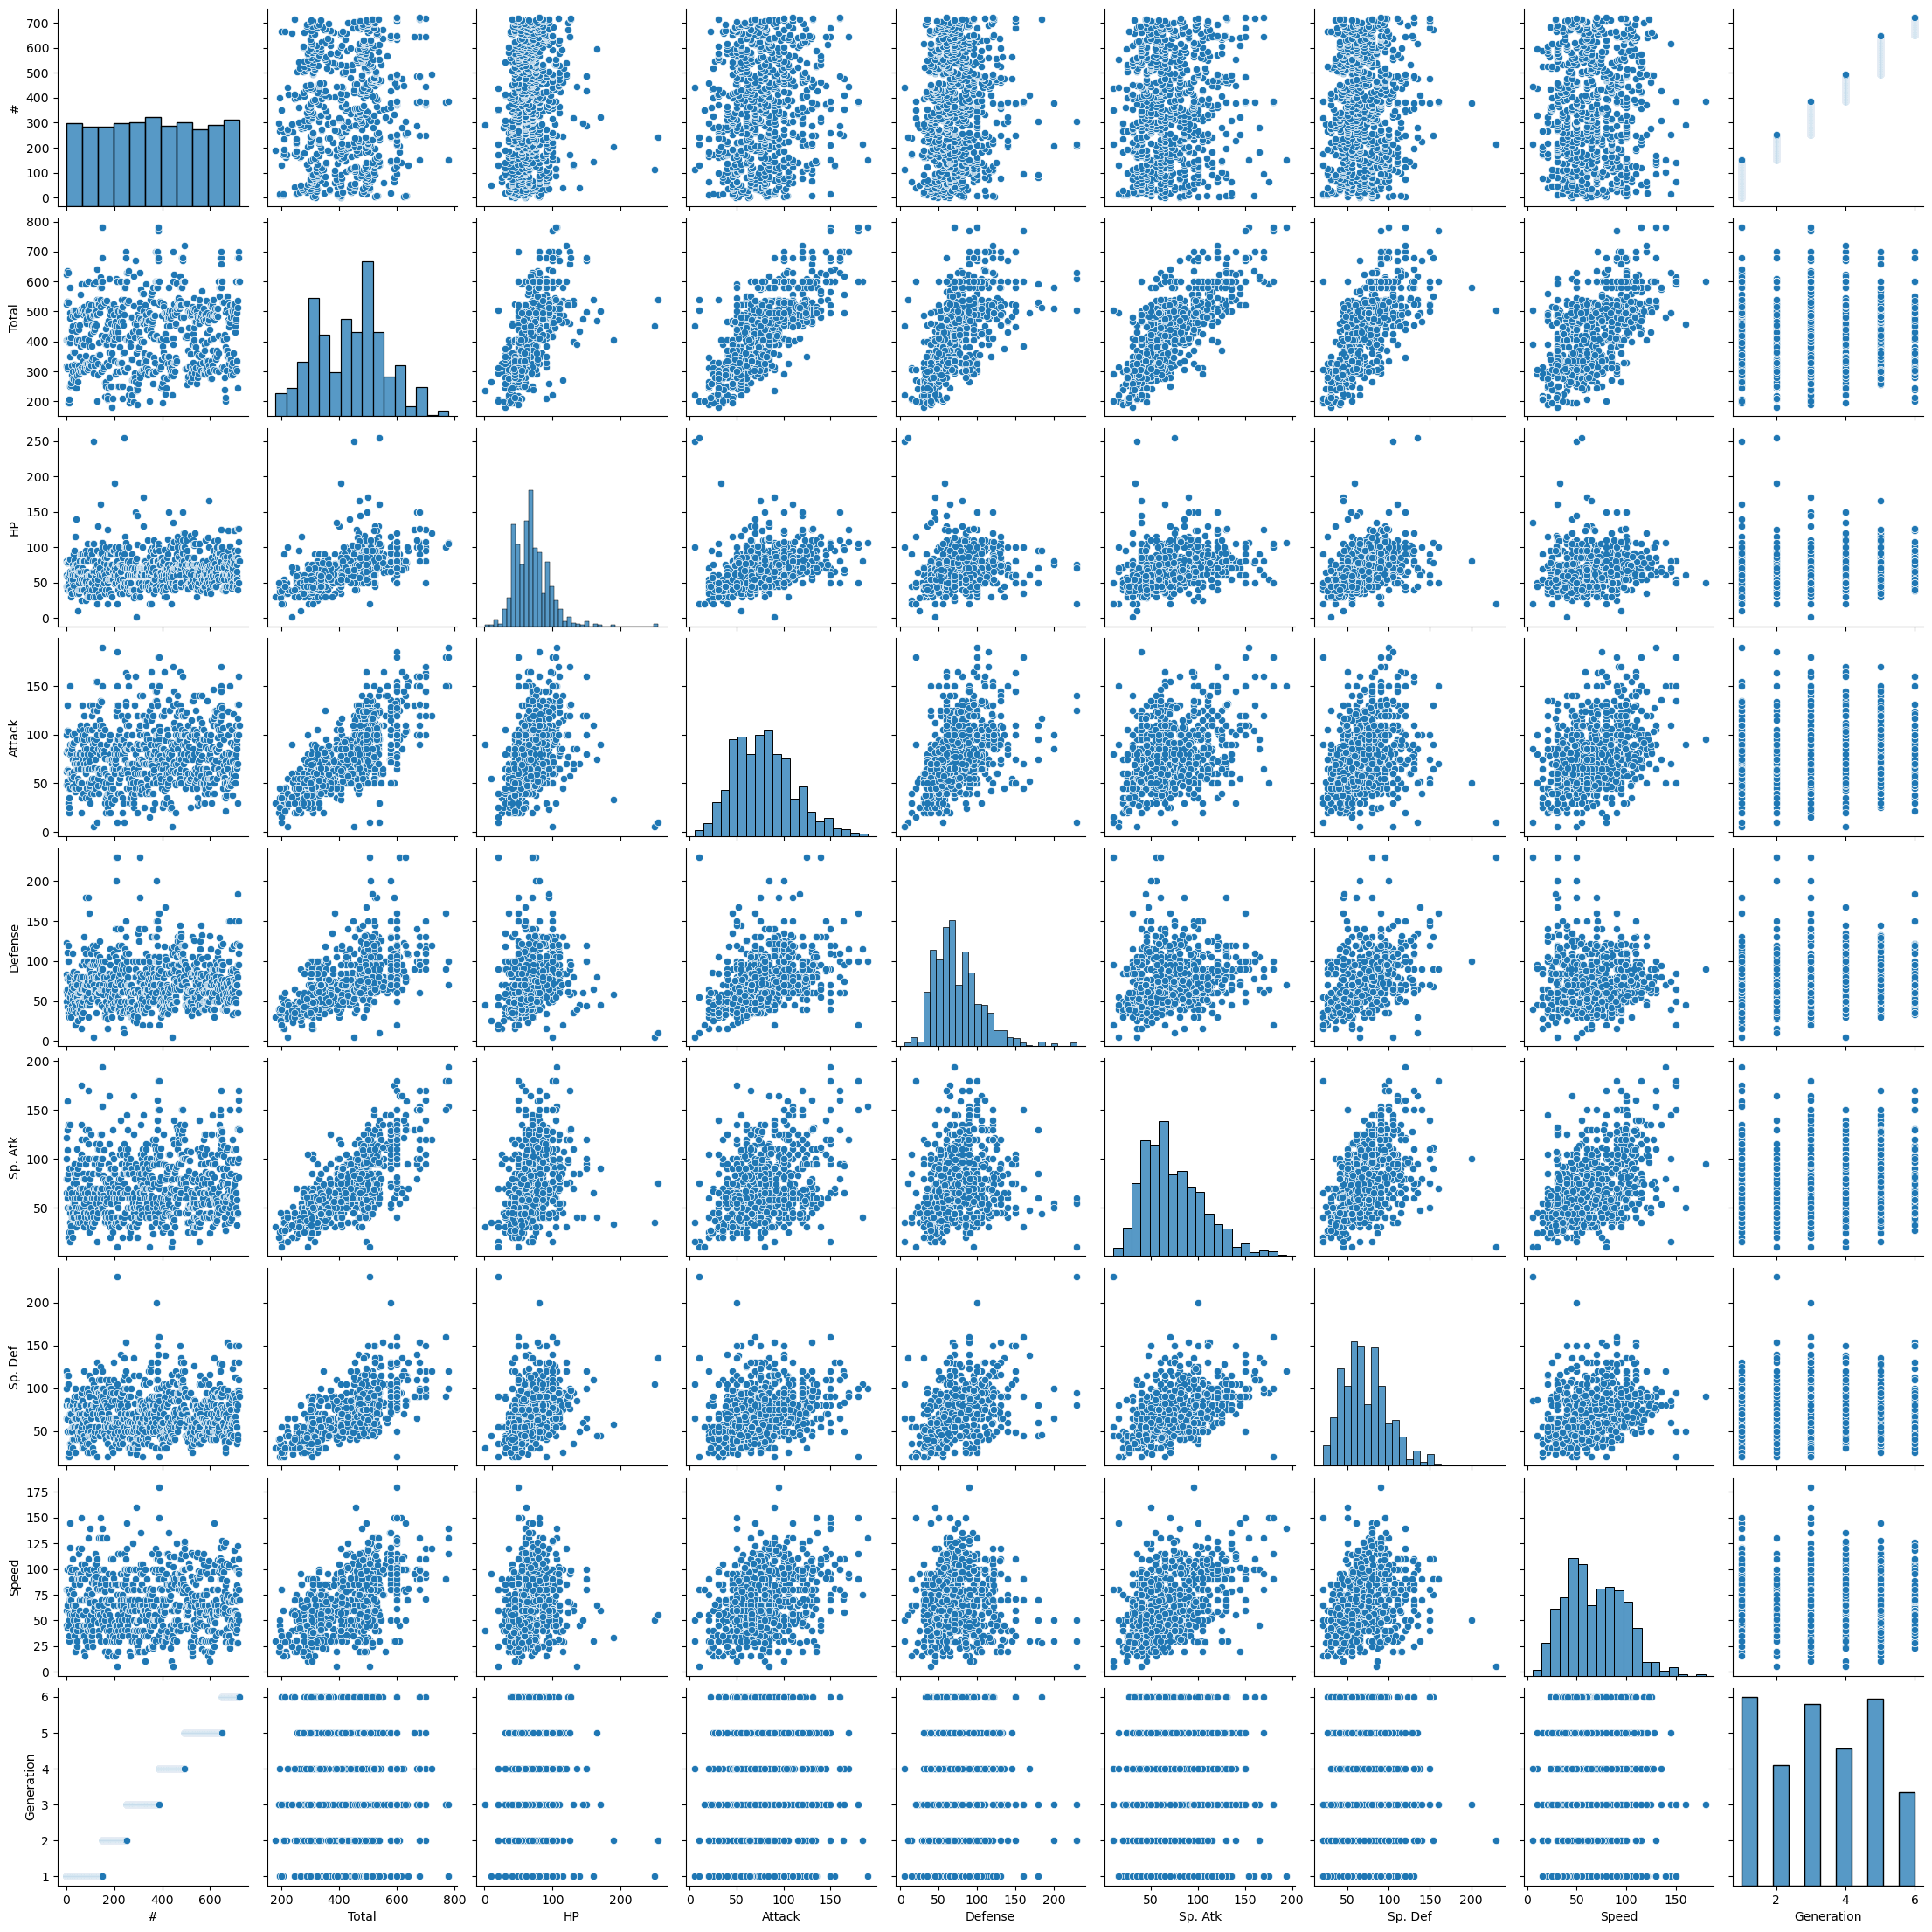

In [61]:
sns.pairplot(df.drop(['Legendary'], axis=1))

<Axes: xlabel='Attack', ylabel='Speed'>

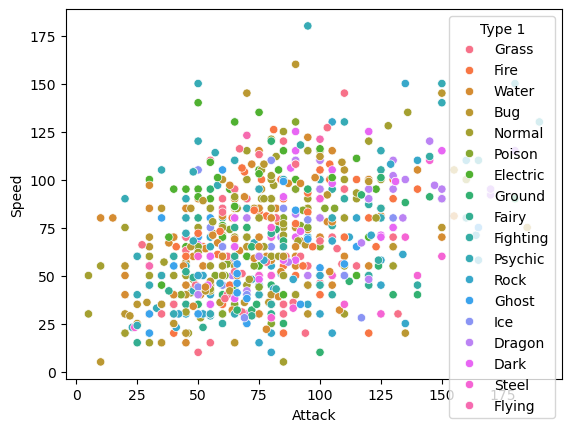

In [62]:
sns.scatterplot(x='Attack', y='Speed', hue='Type 1', data=df)

<Axes: xlabel='Attack', ylabel='Speed'>

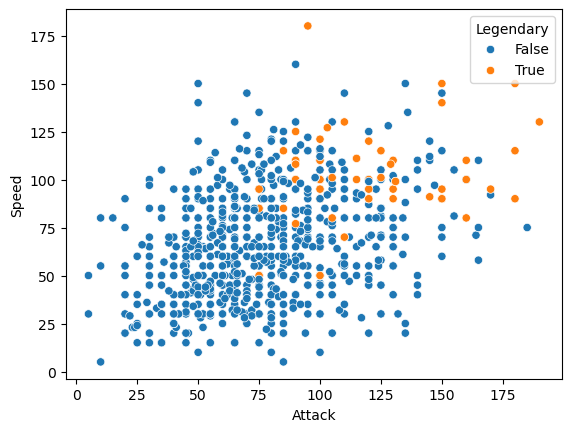

In [63]:
sns.scatterplot(x='Attack', y='Speed', hue='Legendary', data=df)

Correlations -- many things correlate with "total," which makes sense since that is just the sum of all the stats

<Axes: >

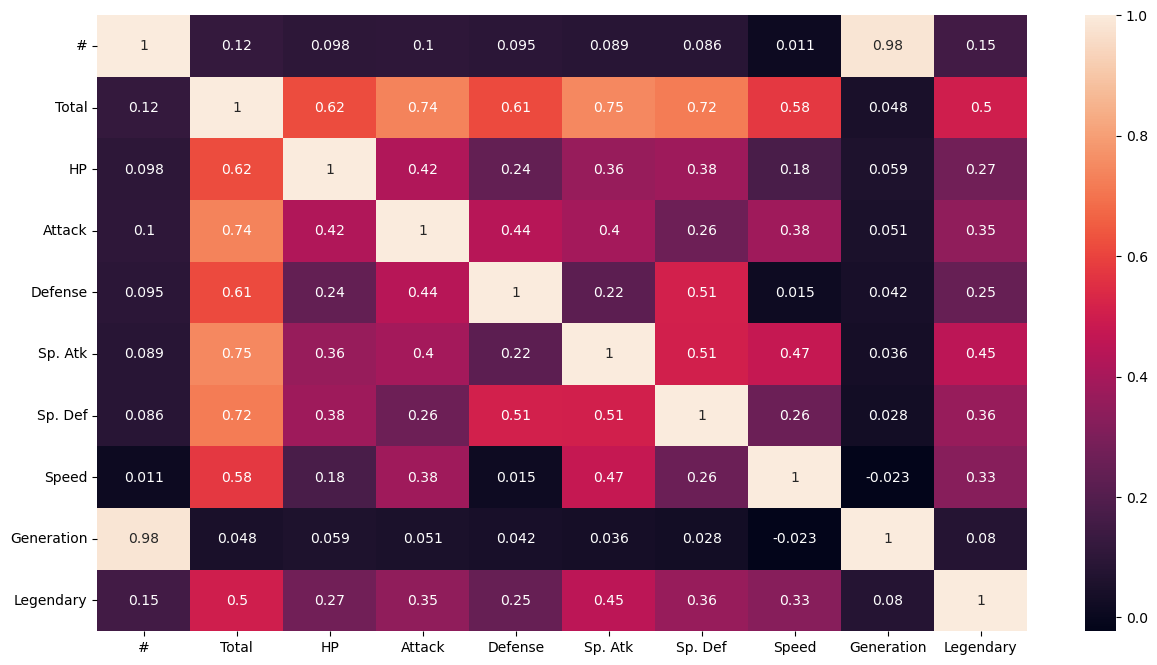

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only= True),annot = True)
## or you can drop the non-numeric columns instead of setting numerically_only to True
## sns.heatmap(df.drop["Name","Type 1","Type 2"].corr(),annot = True)

<font color="red">What have you learned about the data from the initial visualization process?</font>

feel free to create your own visualizations as well!

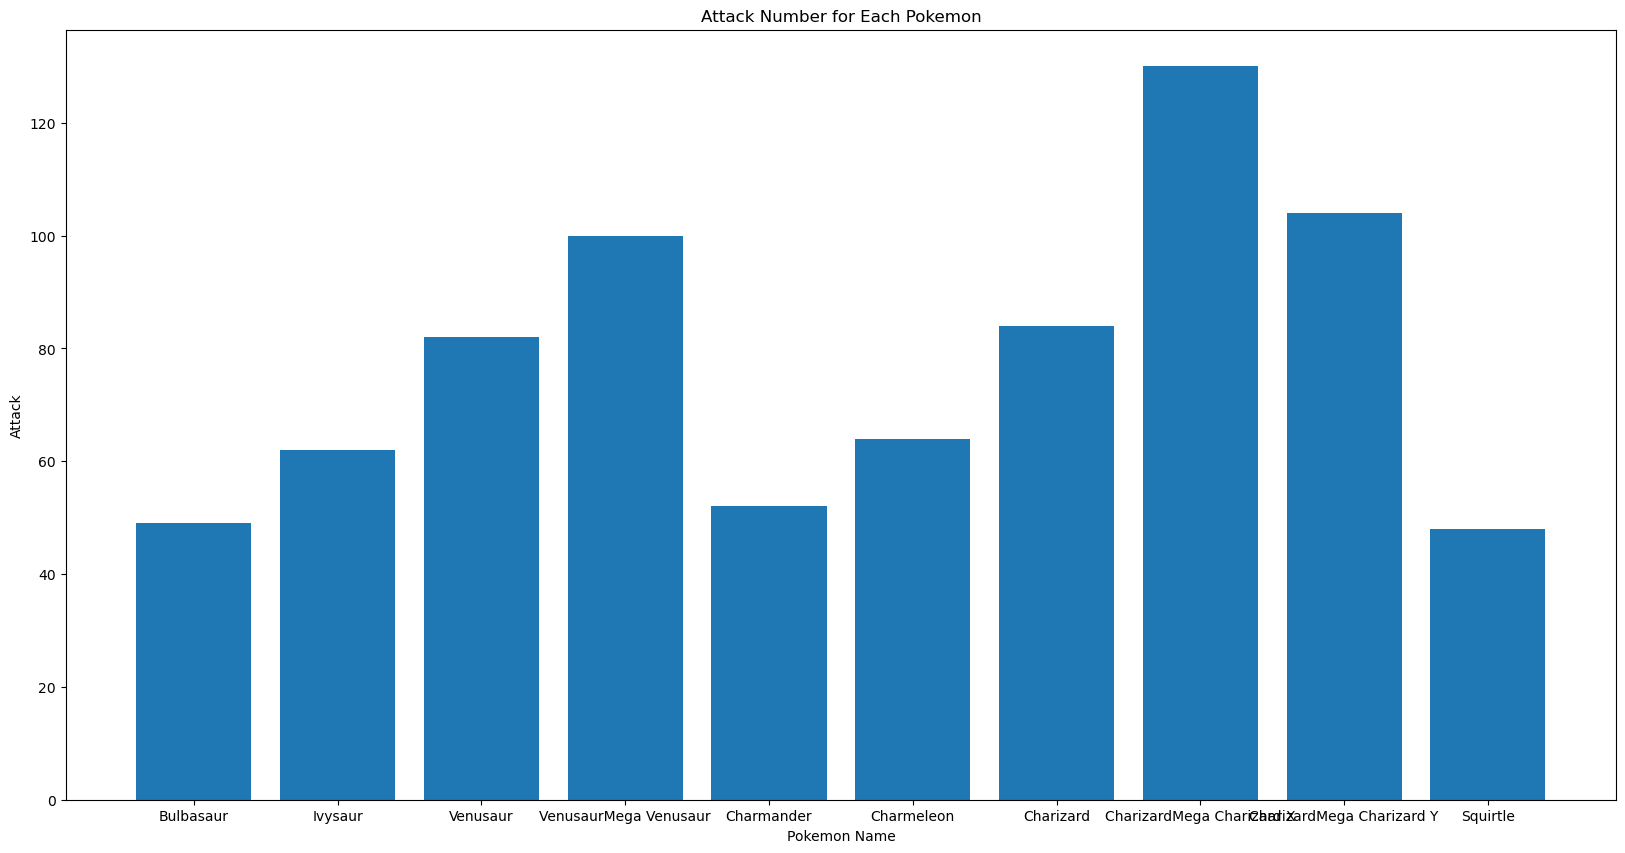

In [65]:
# Creating a bar graph to see how the first 10 pokemons attacking capabilites look
plt.figure(figsize=(20,10))
plt.bar(df['Name'][:10], df['Attack'][:10])
plt.xlabel('Pokemon Name')
plt.ylabel('Attack')
plt.title('Attack Number for Each Pokemon')
plt.show()

## Explore Visualization using PCA

<font color="red">Briefly explain what PCA is on a high-level.</font>

 It is a technique used to emphasize variation and bring out strong patterns in a dataset. It does so by transforming the data into a new coordinate system, where the greatest variances by any projection of the. This helps in reducing the dimensionality of the data while retaining most of the variation in the dataset.


In [66]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Make a dictionary for converting the type columns (and also knowing which values relate to what type when we come to look at it again later).

In [67]:
types = {'Grass':0, 'Fire':3, 'Water':4, 'Bug':5, 'Normal':6, 'Poison':7, 'Electric':8,
       'Ground':9, 'Fairy':10, 'Fighting':11, 'Psychic':12, 'Rock':13, 'Ghost':14, 'Ice':15,
       'Dragon':16, 'Dark':17, 'Steel':18, 'Flying':19}

In [68]:
df['Type 1'] = df['Type 1'].replace(types)

/var/folders/67/h48x2gnj2gb8ph6cgn5k4kdh0000gn/T/ipykernel_26271/122377318.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type 1'] = df['Type 1'].replace(types)


In [69]:
df['Type 2'] = df['Type 2'].replace(types)

/var/folders/67/h48x2gnj2gb8ph6cgn5k4kdh0000gn/T/ipykernel_26271/3421794385.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type 2'] = df['Type 2'].replace(types)


In [70]:
df.loc[:, 'Type 2'] = df['Type 2'].fillna(-1)

In [71]:
#Let's only use the basic stats as X data.
X = df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]

In [72]:
#Create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

Once we have our PCA dataframe, we can start manually exploring where clusters may exists through visualizations.

There's no obvious visual clusters from the initial PCA.

<Axes: xlabel='0', ylabel='1'>

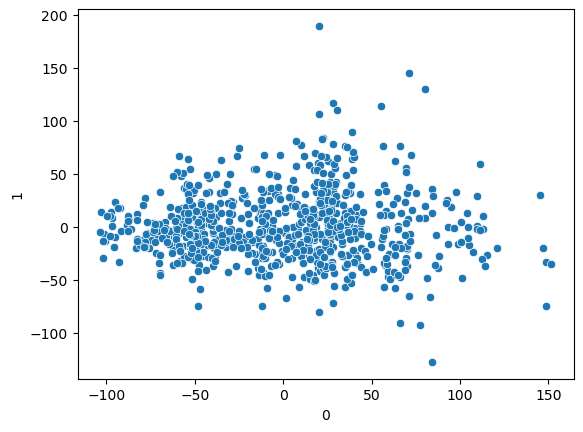

In [73]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

We can see that the legendary ones seem to typically fall closer to the right (but it still isn't clear cut).

<Axes: xlabel='0', ylabel='1'>

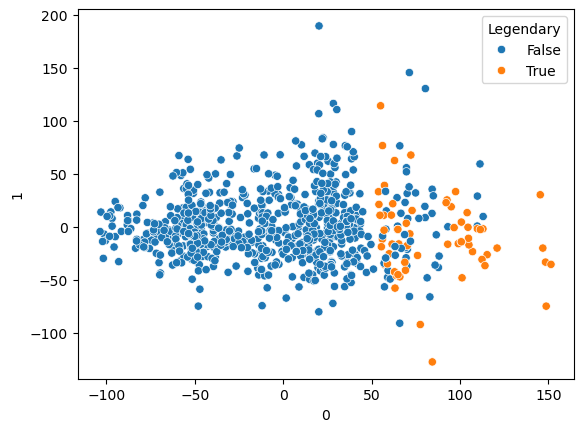

In [74]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.Legendary)

Type 1 also doesn't seem to be relevant.

<Axes: xlabel='0', ylabel='1'>

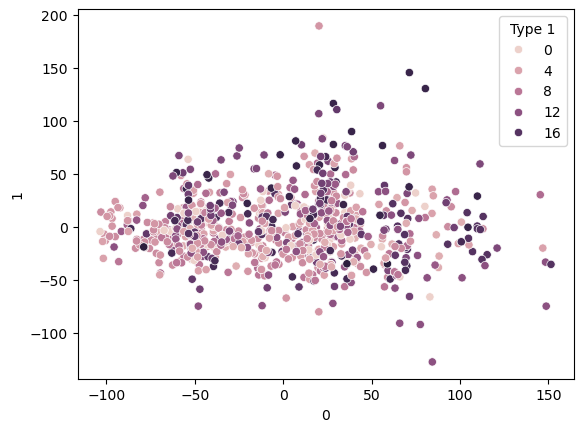

In [75]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Type 1'])

<Axes: xlabel='0', ylabel='1'>

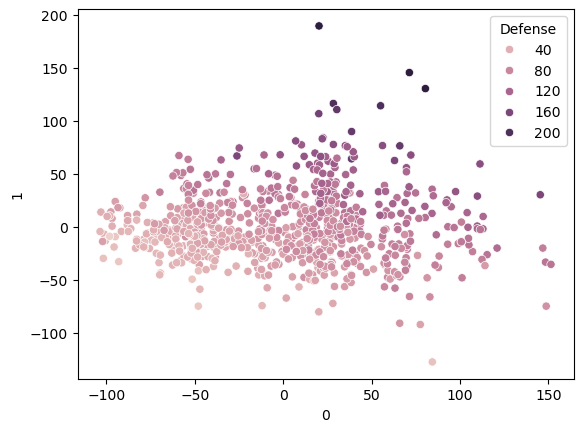

In [76]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Defense'])

<Axes: xlabel='0', ylabel='1'>

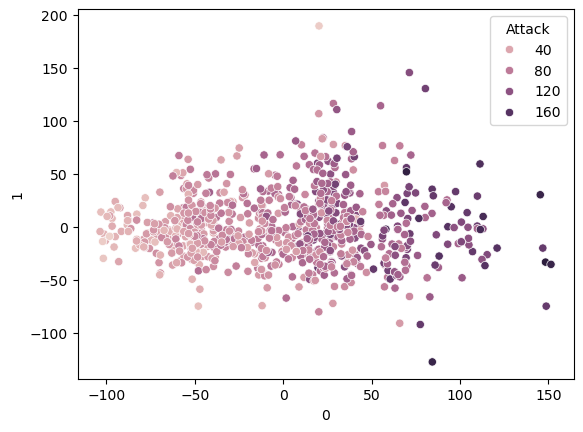

In [77]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Attack'])

<font color="red">What advantages do the PCA visualizations have over the original dataframe? (Why do we do this?)</font>

Based on these atleast from my understanding we can see linear relationships to try understand what features may have higher coorelation among each other. Also this helps to see what some of the high and low values are wihthin the dataset asides from scrolling through the entire dataset and checking. 

<hr>

## K-Means Clustering

We will begin our modeling with K-Means Clustering.

<font color = "red">Briefly explain how the K-Means clustering model works.</font>

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct, non overlapping subsets or clusters. It works by initializing K centroids, assigning each data point to the nearest centroid, and then updating the centroids based on the mean of the assigned points. 

Remember how we determine the best number of clusters (if we can't just manually look at it and decide)?  
  
We look at the variance -- or, the sum of squared distances between the observations and their centroids.
Note: "inertia" is the "within-cluster sum-of-squares criterion." See [scikit learn documentation](https://scikit-learn.org/stable/modules/clustering.html).

In [78]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Here, we see that the variance decreases significantly until 2, and then starts to decrease at a slower rate afterwards. Therefore, 2 is our preferred number of clusters.

Text(0, 0.5, 'Variance')

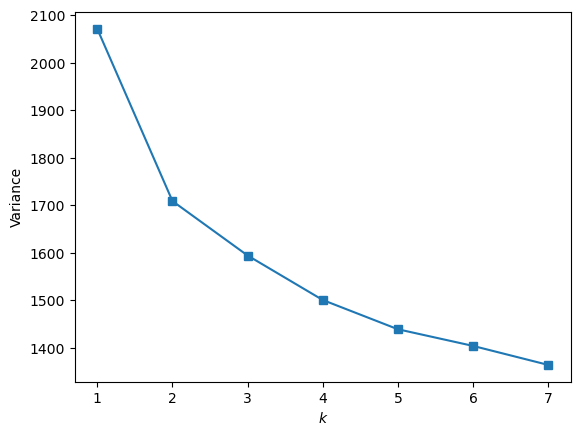

In [79]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

<font color = "red"> In this case, what is the optimal number of clusters and why?</font>

The optimal number of clusters is 2. This is because the elbow graph shows a significant decrease in variance until 2 clusters, after which the rate of decrease slows down. This point, where the curve starts to create the elbow, indicating the optimal number of clusters.

In [80]:
#create KMeans model
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

Now that we have fit our k-means clusters, let's just find what value (0 or 1, since we have set K=2) each row of data is so we can visualize it.

In [81]:
y = kmeans.fit_predict(X)

We are reusing the PCA (dimensionality reduction) data frame for the sake of visualizing 2-dimensional data (rather than 5).

<Axes: xlabel='0', ylabel='1'>

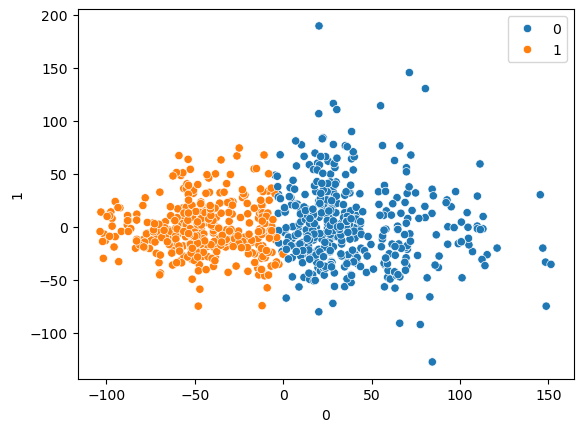

In [82]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

We could also try plotting individual features to take a look.

<Axes: xlabel='Attack', ylabel='Defense'>

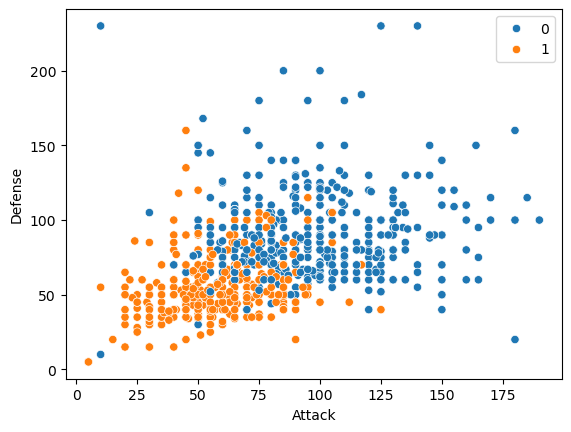

In [83]:
sns.scatterplot(x = df['Attack'], y = df['Defense'], hue=y)

<font color = "red">What do these clusters potentially represent? What separates the two clusters?</font>

Well in regrad to speration we can see that one is spcifically targeting defense in the df. Where as the other one is targetting the PCA-DF for 2 dimensional analysis. 

Let's add our clusters back to the original DataFrame so we can take a look at some of the items.  

In [84]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([df, y_df], axis=1)

In [85]:
new_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,0,7.0,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,0,7.0,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,0,7.0,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,0,7.0,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,3,-1.0,309,39,52,43,60,50,65,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,13,10.0,600,50,100,150,100,150,50,6,True,0
796,719,DiancieMega Diancie,13,10.0,700,50,160,110,160,110,110,6,True,0
797,720,HoopaHoopa Confined,12,14.0,600,80,110,60,150,130,70,6,True,0
798,720,HoopaHoopa Unbound,12,17.0,680,80,160,60,170,130,80,6,True,0


Making an interactive scatterplot (so it is easier to hover over individual data points.)
Also note that the x- and y-axis are our PCA values (from dimensionality reduction).  
Below, we concat the dataframe along with the PCA values so that we can visualize properly. `hover_data` allows us to specify which columns we want to look at when hovering over each point.

In [86]:
pca_df

,0,1
0,-45.860728,-5.384432
1,-11.152937,-5.805620
2,36.946009,-5.236130
3,80.128413,18.995343
4,-50.385905,-21.792797
...,...,...
795,72.196952,67.431919
796,120.944879,-20.303238
797,75.999885,-27.270786
798,114.096713,-36.870567


In [87]:
# Install plotly if needed
# !pip install plotly

In [88]:
import plotly.express as px

In [89]:
fig = px.scatter(pd.concat([new_df, pca_df], axis = 1),
                 x = 0, y = 1, color='Cluster', hover_data=['Name','Type 1','Type 2','Legendary'])
fig.show()

<hr>

## Agglomerative Clustering

Let's try agglomerative clustering with the same dataset as what we did above to see how it differs. But first, <font color="red">can you give a brief description of Agglomerative Clustering?

Agglomerative clustering is a type of hierarchical clustering. It starts with each data point as its own cluster. Then, it iteratively merges the closest pairs of clusters until all points are in a single cluster or a desired number of clusters is reached.

In [90]:
AgglomerativeClustering?

Init signature:
AgglomerativeClustering(
    n_clusters=2,
    *,
    metric='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)
Docstring:     
Agglomerative Clustering.

Recursively merges pair of clusters of sample data; uses linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

metric : str or callable, default="euclidean"
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed". If linkage is "ward", only
    "euclidean" is accepted. If "precomputed", a distance matrix is needed
    as input for the fit method.

    .. versionadded:: 1.2

    .. deprecated:: 1.4
       `metric=None` is deprecated in 1.4 and will be removed in 1

We have already done some pre-processing, but to keep things together for this practice, lets put them here again! We will be using the same "X" from K-Means with HP, Attack, Defense, Special Attack and Special Defense with Speed as well.

In [91]:
X = df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]


Let's figure out how many clusters is optimal for this model. Agglomerative Clustering used a dendrogram to determine this number!



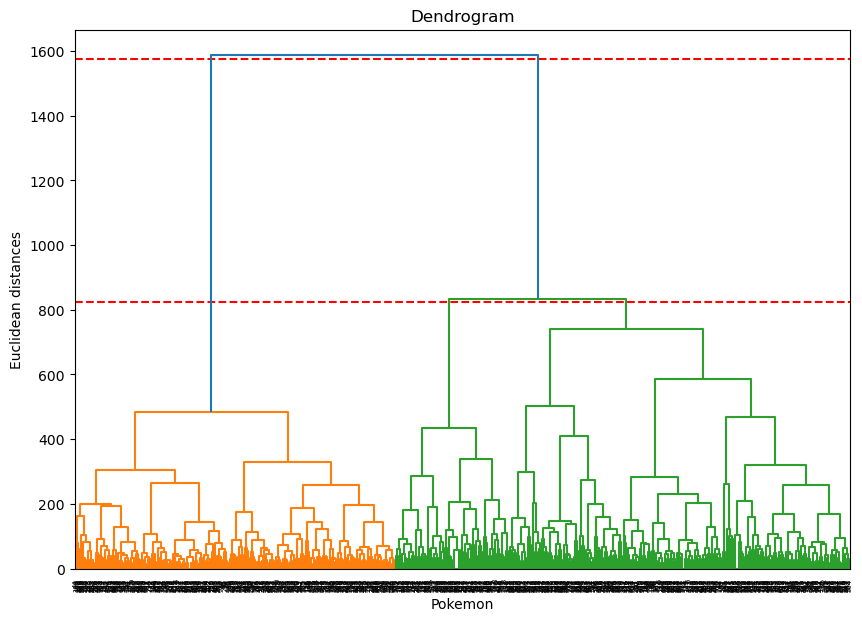

In [92]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('Pokemon')
plt.ylabel('Euclidean distances')
plt.axhline(y=825, color='r', linestyle='--')
plt.axhline(y=1575, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))


To read a dendrogram to find the optimal number of clusters, find the section with the highest width. the number of lines (in this example the blue lines) intersecting the section is the optimal number of clusters. <font color = "red"> Can you tell how many clusters is the optimal amount?

Based on the the horizintal lines and and width the optimal number is 3 because the widest section of the dendrogram, where the red lines intersect, indicates three distinct clusters.

After determining what the optimal number of clusters is, input it into the model implementation below!

In [93]:
# Put your optimal number of clusters here
optimal_number = 3

# Implement model
agglo = AgglomerativeClustering(n_clusters= optimal_number, metric='euclidean', linkage='ward')

# Alternate implementation if you are using an older version that uses "affinity" and not "metric"
#agglo = AgglomerativeClustering(n_clusters= optimal_number, affinity='euclidean', linkage='ward')


Now lets fit and create some prediction to visualize the clusters!

In [94]:
y_agglo = agglo.fit_predict(X)

Now let's visualize! We will once again be using PCA to do so.

<Axes: xlabel='0', ylabel='1'>

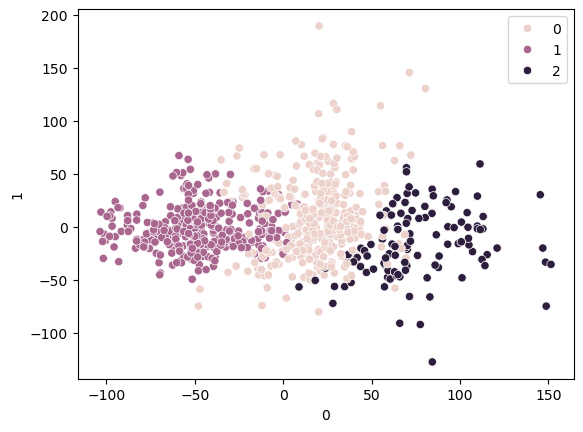

In [95]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y_agglo)

Now lets look again at K-Means visual again to compare

<Axes: xlabel='0', ylabel='1'>

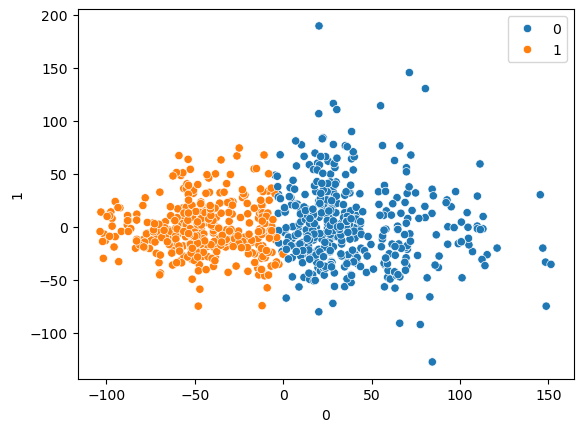

In [96]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<font color = "red"> Can you note any differences or similarities you may see?

Yes both of these graphs seems to have the same distribution from what it looks like.

Lets also again look at some seperate features. Will be again looking at attack and defense just as we did with K-means!

<Axes: xlabel='Attack', ylabel='Defense'>

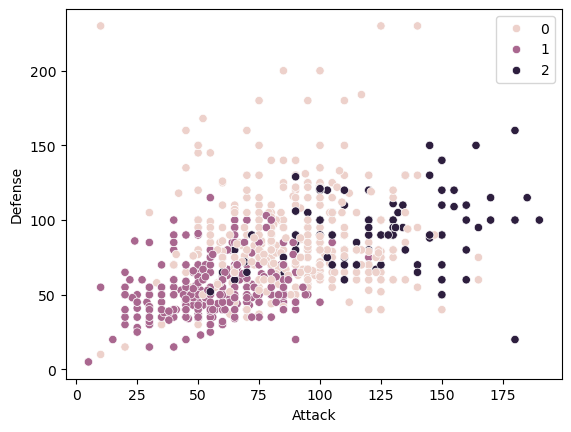

In [97]:
sns.scatterplot(x = df['Attack'], y = df['Defense'], hue=y_agglo)

Once again, pulling up the K-means visual for quick comparison. <font color = "red"> Can you not any similarities or differences once again?

In comapraison to the two before this ones clusters seem more scattered.

<Axes: xlabel='Attack', ylabel='Defense'>

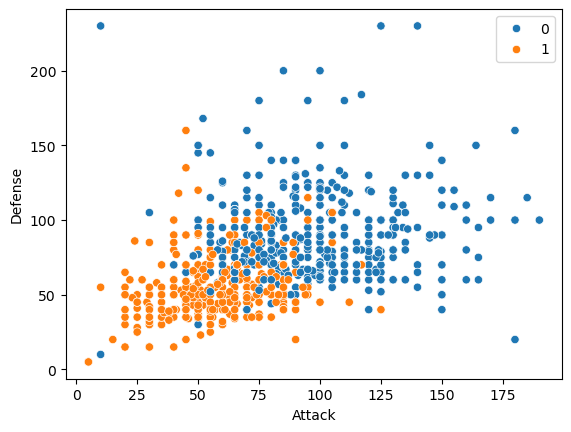

In [98]:
sns.scatterplot(x = df['Attack'], y = df['Defense'], hue=y)

<font color = "red"> Make another plot of your choosing to get a better understanding of what the clusters may represent!


<Axes: xlabel='Speed', ylabel='Defense'>

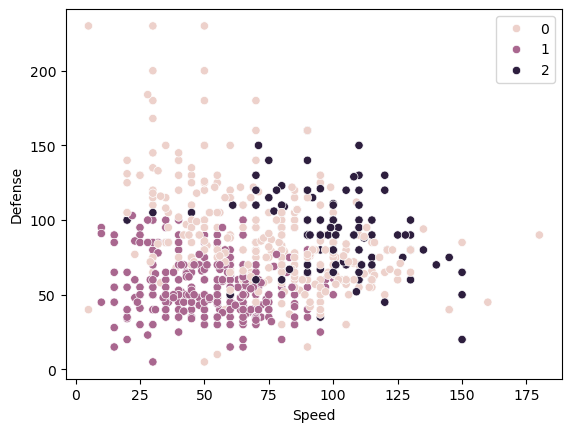

In [101]:
sns.scatterplot(x = df['Speed'], y = df['Defense'], hue=y_agglo)

Lets make an interactive scatterplot again! Remember to note that the x- and y-axis are our PCA values (from dimensionality reduction).
Below, we concat the dataframe along with the PCA values so that we can visualize properly. hover_data allows us to specify which columns we want to look at when hovering over each point.

In [99]:
y_a_df = pd.DataFrame(y_agglo, columns=['Cluster (Agglomerative)'])
new_a_df = pd.concat([df, y_a_df], axis=1)

In [100]:
fig = px.scatter(pd.concat([new_a_df, pca_df], axis = 1),
                 x = 0, y = 1, color='Cluster (Agglomerative)', hover_data=['Name','Type 1','Type 2','Legendary','Total'])
fig.show()

<hr>

<font color="red">In general, what can clustering teach us about data?</font>

Clustering can reveal the underlying structure of the data by grouping similar data points together. It helps in identifying patterns, relationships, and natural groupings within the data. This can be useful for understanding the distribution and characteristics of the data, identifying outliers or anomalies, simplifying data for further analysis, enhancing the performance of machine learning models by providing insights into the data's structure, and supporting decision-making processes by highlighting key segments or clusters within the data.
